# Part I - (Propser Loan Data dataset )
## by (Lerato Maluleke)

## Introduction
> Introduction

This analysis explores information from the Prosper Loan dataset. The provided csv file contains data for 113,937 loans with 81 variable on each loan, including loan amount, borrower rate(or interest rate), current loan status, if they default or pay on time etc.

According to their website: “Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States.

## Preliminary Wrangling


<h2>Table of content</h2>
<ol>
    <li><a href="#load">Load data</a></li>
    <li><a href="#breakdown">Break down of the dataframe</a>
        <ol>
            <li><a href="#describe">Describe dataframe</a></li>
        </ol>
    </li>
    <li><a href="#structure">What is the structure of your dataset?</a></li>
    <li><a href="feature">What is/are the main feature(s) of interest in your dataset?</a></li>
    <li><a href="#features">What features in the dataset do you think will help support your investigation into your feature(s) of interest?</a></li>
    <li><a href="#univariate">Univariate Exploration</a>
        <ol>
            <li><a href="#credit">How does the credit score affect the loans outcome?</a></li>
            <li><a href="#loan-term">How does the loan term affect the loans outcome?</a></li>
            <li><a href="#employment">Is employment one of the important factor?</a></li>
            <li><a href="#borrower">Prosper rating</a></li>
            <li><a href="#In which rating are borrowers likely to get a loan?">Loan original amount</a></li>
    </li>
    <li><a href="#affects">What effects the borrowers APR or interest rate in prosper loan?</a>
        <ol>
            <li><a href="#apr">Borrower's APR or interest rate</a></li>
        </ol>
      </li>
    <li><a href="#distribution">Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?</a>
        <ol>
            <li><a href="#unusual-distribution">Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?</a></li>
        </ol>
    </li>
        <li><a href="#bivariate">Bivariate Exploration</a>
            <ol>
                <li><a href="#effects">Does employment have any effect on the outcome of the loan status?</a></li>
                <li><a href="#term">Can the lenghth of a term affect the consistances of how one pays?</a></li>
                <li><a href="#employment">Is there any relationship between Emploment status and PropserRating ?</a></li>
            </ol>
        </li>
    <li><a href="#relationships">Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?</a>
    <ol>
                <li><a href="#interactions">Were there any interesting or surprising interactions between features?</a></li>
        </ol>
        </li>
        <li><a href="#multivariate">Multivariate Exploration</a>
            <ol>
                <li><a href="#variables">How different variables interact/relationship.</a></li>
            </ol>
    <li><a href="#strengthened">Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?</a>
        <ol>
            <li><a href="#interesting">Were there any interesting or surprising interactions between features?</a></li>
        </ol>
</ol>

In [1]:
# import all packages and set plots to be embedded inline
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import csv
import seaborn as sns

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')



# Base color for graphs 

base_color = sb.color_palette()[0]

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.
<div id="load" />

In [2]:
# Load data. 

ploan = pd.read_csv('prosperLoanData.csv')

<div id="breakdown" />

In [3]:
# A breakdown of the dataframe.

print(ploan.shape)
print(ploan.head(5))
print(ploan.info())
print(ploan.dtypes)

(113937, 81)
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18

In [4]:
# Checking for any duplicates. There are no duplicates. 
ploan.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113932    False
113933    False
113934    False
113935    False
113936    False
Length: 113937, dtype: bool

In [5]:
# .head is dispalying  the first 5 rows.
ploan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# Here is a concise summary of this dataframe.
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

<div id="describe" />

In [7]:
# descriptive statistics for numeric variables
ploan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


<div id="structure" />
What is the structure of your dataset?

> The propser data has 113937 entries and 81 data columns with these data types boolean 3,50 float,11 inter and 17 objects. The data has a memory usage of 64.1+ mb. Dataframe has columns which have the monthly loan payment,Loan number, BorrowerAPR etc.

 #   Column                
<div id="feature" />
What is/are the main feature(s) of interest in your dataset?

> What factors affect a loan's outcome status? Will beblooking into those factors. 


<div id="features" />
What features in the dataset do you think will help support your investigation into your feature(s) of interest?


The dataset that can support my investigation include these factors EmploymentStatus,BorrowerAPR,DebtToIncomeRatio BorrowerAPR,Term,ProsperRating,ProsperPaymentsOneMonthPlusLate.            

<div id="univariate" />

## Univariate Exploration


<div id="credit" />

### 1. How does the credit score affect the loans outcome? 

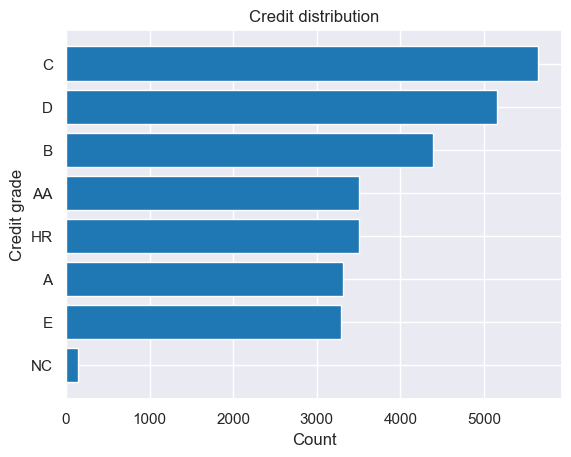

In [8]:
base_color = sb.color_palette()[0]
sb.set()

# Sort CreditGrade values by count in ascending order
status_ordered = ploan['CreditGrade'].value_counts().sort_values(ascending=True)

# Plot horizontal bar chart
plt.barh(status_ordered.index, status_ordered.values, color=base_color)
plt.xlabel('Count')
plt.ylabel('Credit grade')
plt.title('Credit distribution')
plt.show()


Customers who have a credit grade of C, D and B have a higher chance of getting a loan whereas NC has a lower chance of getting a loan.A higher creditscore  indicate a lower risk of default and, therefore, a higher likelihood of loan approval.

<div id="loan-term" />

### 2.How does the loan term affect the loans outcome? 

<AxesSubplot:xlabel='Term', ylabel='count'>

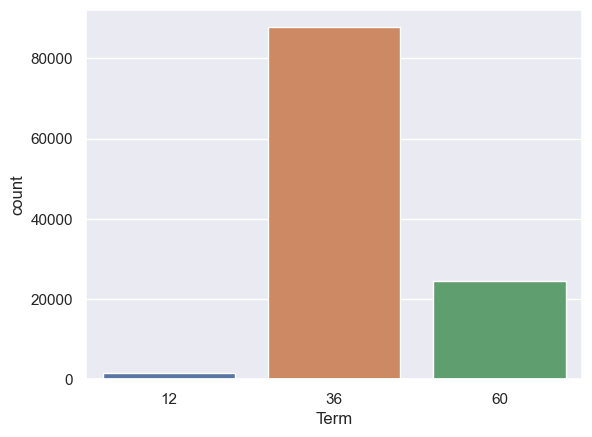

In [9]:
sb.set()
sb.countplot(data=ploan, x='Term')

Loan Term: The length of time a borrower has to repay a loan affects the outcome of the loan. Longer loan terms may provide more flexibility for the borrower, but may also increase their risk of defaulting.This will be compared to another factor in bivariate so we can come to a conclusion on how it affects repayment etc 

<div id="employment" />

### 3.Is employment one of the important factor?

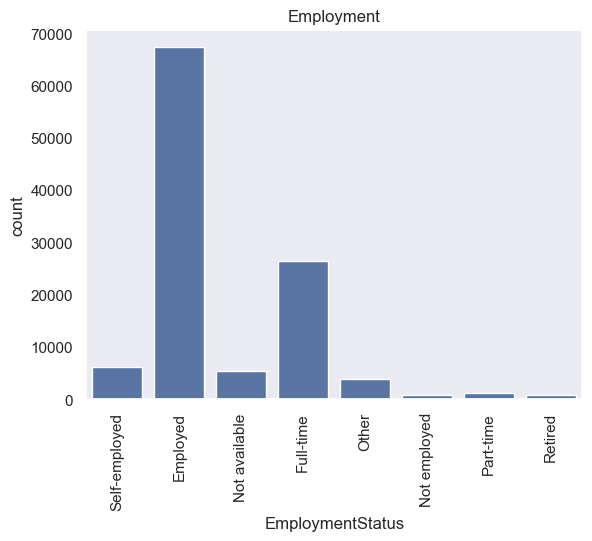

In [10]:
base_color = sb.color_palette()[0]
sb.countplot(data = ploan, x = 'EmploymentStatus', color= base_color)   
plt.xticks(rotation=90)
plt.title('Employment')
plt.grid(False);

The borrower who are employed and who work full-time  have a higer rating than others meaning employment does play a major role when it comes to a loan status being approved and it does play important factor.

<div id="borrower" />

### 4. In which rating are borrowers likely to get a loan?  

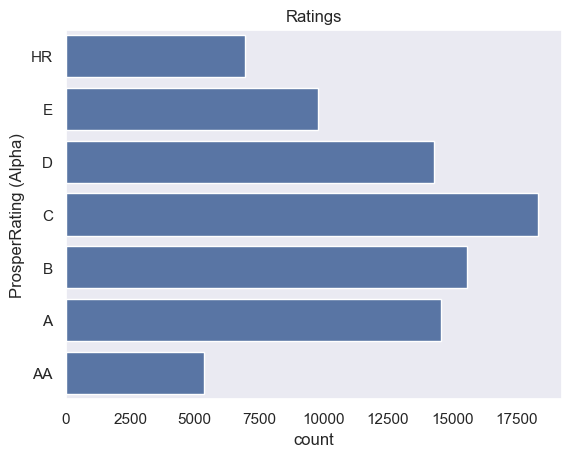

In [11]:
# set the order of the rating categories
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

# create a horizontal bar plot with seaborn
base_color = sb.color_palette()[0]
sb.countplot(data = ploan, y = 'ProsperRating (Alpha)', color = base_color, order = rating_order)

# set the title and remove the grid
plt.title('Ratings')
plt.grid(False);


<div id="propser" />
Prosper Score: The Prosper Score is a proprietary scoring system that assesses the risk of a loan.
The rating from D-A is a good rating tand the outcome is showing with the ones who are getting the loan compared to other bad ratings. 

<div id="original-amount" />

### 5.Loan original amount

In [12]:
ploan['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

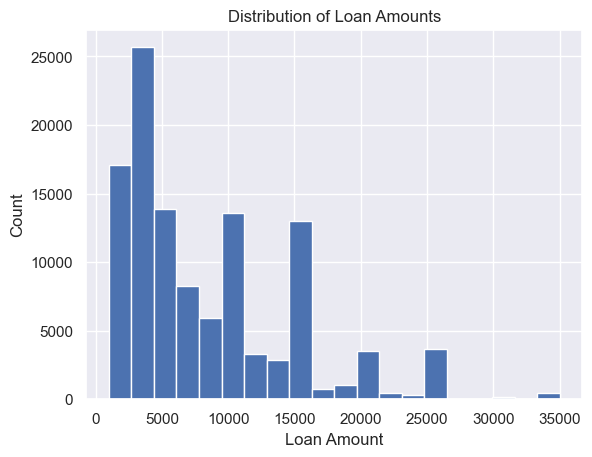

In [13]:
plt.hist(ploan['LoanOriginalAmount'], bins = 20)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts')
plt.show()


The histograph show a sharp increase of the graph aorund 4.5k then a drastic decrease. A stable decrease then aother drastic increase in the loan amount. This graph show an unstable amount it will either be too high or low.It display that different borrowers are approved based on the different capabilities and factors. 

<div id="affects" />

#### What effects the borrowers APR or interest rate in prosper loan ? 

The borrower's APR or interest rate in a Prosper loan is determined by a number of factors, including their credit score, debt-to-income ratio, loan term. Additionally, Prosper takes into account the borrower's past payment history, the amount of available funds in the borrower's account, and the borrower's listing category.Here we will be looking at more variables from adding from the ones already mentioned from above. These variables answer our question here. 

<div id="apr" />

### 1. Borrower's APR or interest rate 

In [14]:
plt.figure(figsize=[8, 6])
sb.histplot(data=ploan, x='BorrowerAPR', bins=bins)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Distribution of Borrower APR')
plt.show()


NameError: name 'bins' is not defined

<Figure size 800x600 with 0 Axes>

The histogram show most of the borrowers have the APR Between 0.1 and 0.4. There is a peak around 0.2 and 0.35

 <div id="distribution" />
 
### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The drastic differebce in the the origibal loan amount makes one wonder how can one qualify for huge amount of money without considering the different amount of incomes the borroers have. It reveals that other factors play a huge role. 


 <div id="unusual-distribution" />
 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The borrower apr shows an unusual peak aoeund 0.35 this make me wonder. 

> Loan amount graph dispay alot of loan amount which are a lesser amount of loan are more compared to those who borrow 35k+

> Propser Rating was set in oreder to help in analysing the graph and getting a clear understanding of which rate is more and which one is less etc. 

 <div id="bivariate" />
 
## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my data. Futhuremore the variables that I will cover here have been introduced in some fashion in the previous section (univariate exploration).

<div id="effects" />

#### Does employment have any effect on the outcome of the loan status? 


In [ ]:

# create FacetGrid object
g = sns.FacetGrid(ploan, row="EmploymentStatus", height=5, aspect=2)

# add bar chart to each facet
g.map(sns.countplot, "LoanStatus")

# customize axes labels and titles
g.set_axis_labels("Loan Status", "Count")
g.set_titles("{row_name}")

# rotate x-axis labels
g.set_xticklabels(rotation=90)

# adjust plot layout
g.tight_layout()

# show plot
plt.show()


The first graph for employment shows a huge number of completed loans less loans which are current and defaulted, compared to those who paid and past due 15 days or less.Employment seems to have a positive impact when it comes to customers who pay off thier loans. Full-time employed have the second most numbers in completed loans, less current loans followed by an increase in defaults and less in defaults. Other graphs show little to nothing in status to show that one of the fundamentntal influences on what the banks consider when applying for a loan is employment if one is employed full-time ,part-time and so forth once that is considered then the status of the loan can be considered hence some of the graph there is less to no data to be anaylsed. 

<div id="term" />

#### Can the lenghth of a term affect the consistances of how one pays? 

In [ ]:
# create subset of data to plot
ploancopy = ploan[['ProsperPaymentsOneMonthPlusLate', 'Term']]

# create scatter plot
sns.scatterplot(data=ploancopy, x='ProsperPaymentsOneMonthPlusLate', y='Term')

# add axis labels
plt.xlabel('Late Payment')
plt.ylabel('Term')

# show plot
plt.show()


The graph shows a relationship between term and propserPaymentoneMonthpluslate. In the x-axis the propserPaymentoneMonthpluslate variable display customers who have missed a payment more than one mnonth. Customers who have missed payment more than one month are a higher risk. in the y-axis display a loan term  in months this variable measures the customers financial commitment which show that a longer term loans represent a larger financial commitment for the customer then a shorter-term loans. Furthuremore with all of this said the graph show a dots and each dot represent a loan. 

There are more dots showing in short term loans an estimate of 39 months and less. Even though the are some customers who have defaulted in longer terms but most are in short-term. That is how the length og the term affects how one pays. 

<div id="employment" />

#### Is there any relationship between Emploment status and PropserRating?

In [ ]:
# create clustered bar plot
sns.countplot(data=ploan, x='EmploymentStatus', hue='ProsperRating (Alpha)')

# add axis labels
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Rating by Employment')

# rotate x-axis labels
plt.xticks(rotation=90)

# show plot
plt.show()


The resulting plot shows the distribution of ProsperRating for each value of EmploymentStatus. We can see that for most EmploymentStatus categories, the majority of loans have a ProsperRating of C or D. However, there are some differences between categories: for example, self-employed borrowers are more likely to have a ProsperRating of HR (high-risk) than borrowers who are employed or retired.

 <div id="relationships" />
Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> While observing the loan status and employment I realised I had to adjust the layouy using the tight_layout and adjust the height since most of the graph is too small to help make a better analysis.Employment, full-time and part-time show more lcearly than unemployed and other graphs showing that the eployment does have some effect on the status of the loan. The x-axis was rotated to 90 degrees for better viewing. 

> The term and more than one months late payment the position of the plot sjows the value of months late in payment and the term value. Observing the trend is display a higher months missed in payment values having shorter terms. 



 <div id="interactions" />
 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In the loan status graph the graph that is showing other has number than other status even though the information was not specified on what is other. 

 <div id="multivariate" />
 
### Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
# select the variables of interest
loan_subset  = ploan[['EmploymentStatus', 'Term']]

# create a cross-tabulation table
ct = pd.crosstab(index=loan_subset['EmploymentStatus'], columns=loan_subset['Term'], normalize='index')

# create a heatmap plot
sns.heatmap(ct, cmap="YlGnBu", annot=True, fmt='.2f', cbar=False)

# set plot title and axis labels
plt.title('Heatmap of Employment Status vs. Loan Term')
# plt.xlabel('Loan Term')
# plt.ylabel('Employment Status')

# show plot
plt.show()

The darkest color represent the high proportion of borrowers while the light color show a low proportion.We can say that the graph suggets that most borrowers have a loan term of 36 months and are employed full-time or have another source of income. 

<div id="variables" />

#### How different variables interact/relationship. 

In [ ]:
# reset the index if the column names are not in the index
ploan = ploan.reset_index()

# select the required columns
selected_cols = ['ProsperRating (Alpha)', 'DebtToIncomeRatio','EmploymentStatus','Term']
ploan = ploan[selected_cols]

import seaborn as sns

# Create a pair grid with multiple variables
g = sns.PairGrid(ploan, vars=["DebtToIncomeRatio", "ProsperRating (Alpha)","Term"])

# Map scatter plot to upper triangle
g.map_upper(sns.scatterplot)

# Map histogram plot to diagonal
g.map_diag(sns.histplot)

# Map kernel density plot to lower triangle
g.map_lower(sns.violinplot)

# Add legend
g.add_legend()

# Show plot
plt.show()


This graph shows a PairGrid plot with multiple variables from the Prosper loan dataset. The variables used in this plot are DebtToIncomeRatio, ProsperRating (Alpha), and Term. The upper triangle of the grid contains scatterplots showing the relationship between the variables, while the diagonal contains histograms showing the distribution of each variable. The lower triangle contains violin plots, which are similar to box plots but show the distribution of data in a more detailed way.

From the scatterplots, we can see that DebtToIncomeRatio and ProsperRating (Alpha) are weakly negatively correlated, meaning that as the debt-to-income ratio increases, the Prosper rating tends to decrease slightly. The scatterplot of ProsperRating (Alpha) and Term shows that longer-term oans tend to have higher ratings, while shorter-term loans tend to have lower ratings.

The histograms show that DebtToIncomeRatio is slightly skewed to the right, indicating that most borrowers have a relatively low debt-to-income ratio. ProsperRating (Alpha) is roughly normally distributed, with a peak in the B rating category. The histogram for Term shows that the most common loan term is 36 months.

The violin plots in the lower triangle show the distribution of each variable. The DebtToIncomeRatio plot is skewed to the right, with a few borrowers having very high ratios. The ProsperRating (Alpha) plot shows that the distribution is wider in the lower rating categories, indicating that there is more variability in borrower characteristics among those with lower ratings. Finally, the Term plot shows that the 36-month term is the most common, with a few borrowers taking out loans for longer or shorter terms. 

 <div id="strengthened" />
 
### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the upper triangle, scatterplots are mapped for each pair of variables, while in the diagonal, histograms of each variable are shown. In the lower triangle, a violin plot is mapped to show the distribution of each variable with respect to the other two variables.

From the plot, we can see that DebtToIncomeRatio has a slightly negative relationship with ProsperRating (Alpha), meaning that higher DebtToIncomeRatio values tend to correspond with lower ProsperRating (Alpha) values. The plot also shows that longer loan terms (Term) tend to have higher DebtToIncomeRatio values, and that higher ProsperRating (Alpha) values tend to correspond with shorter loan terms.

The histograms show that DebtToIncomeRatio is heavily skewed to the right, with a long tail of high values. ProsperRating (Alpha) has a relatively even distribution across all rating categories, while the majority of loan terms fall within the 36-60 month range.


 <div id="interesting" />
 
### Were there any interesting or surprising interactions between features?

> The violin plots in the lower triangle show the distribution of each variable for different combinations of the other two variables. It can be seen that for higher ProsperRating (Alpha) values, the DebtToIncomeRatio tends to be lower. Also, for longer loan terms, the ProsperRating (Alpha) tends to be lower.

>The histograms in the diagonal show the distribution of each variable. It can be seen that DebtToIncomeRatio is right-skewed, while ProsperRating (Alpha) and Term are both roughly normally distributed.

> The scatter plots in the upper triangle show that there may be some weak negative correlation between DebtToIncomeRatio and ProsperRating (Alpha), as well as between DebtToIncomeRatio and Term.

In [ ]:
# Converting this report to html format
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_I_exploration.ipynb'])